In [35]:
# https://www.datacamp.com/community/tutorials/recommender-systems-python
# As described in the previous section, simple recommenders are basic systems that recommends the top items based on a certain metric or score. In this section, 
# you will build a simplified clone of IMDB Top 250 Movies using metadata collected from IMDB.

In [36]:
# TFIDF, short for term frequency–inverse document frequency
# https://en.wikipedia.org/wiki/Tf%E2%80%93idf

In [37]:
#  Knowledge of what you have viewed

In [38]:
# Recommendation based on their polularity: a) How many people voted?  b) what is the vote score?

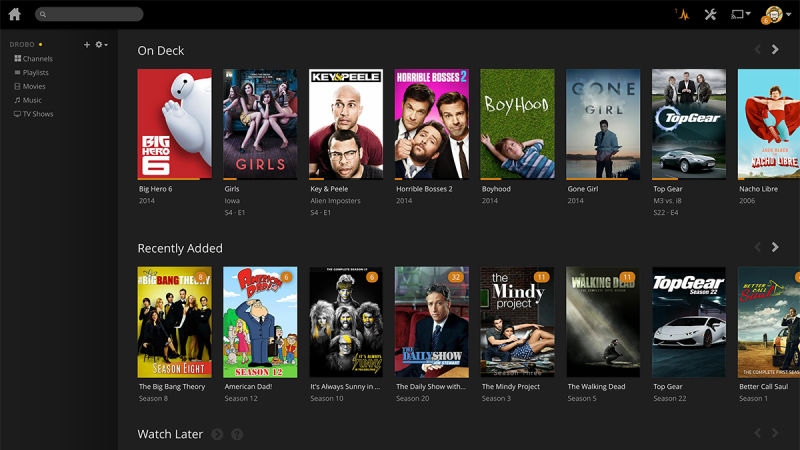

In [1]:
from IPython.display import Image
Image("./data/img/movies.jpg")

In [39]:
import matplotlib
import matplotlib.pyplot as plt

In [40]:
# Import Pandas
import pandas as pd

# Load Movies Metadata
metadata_full = pd.read_csv('./data/the-movies-dataset/movies_metadata.csv', low_memory=True)

c:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
metadata_full.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [7]:
metadata_full.shape

(45466, 24)

In [9]:
metadata_full.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [10]:
metadata = metadata_full.sample(frac=0.5, replace=False, random_state=42, axis=0)

In [11]:
metadata.shape

(22733, 24)

In [42]:
del metadata_full

In [32]:
metadata.reset_index(inplace=True)

In [43]:
metadata.drop("index", axis=1, inplace=True)

In [44]:
# Print the first three rows
metadata.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",https://www.netflix.com/title/80164212,411405,tt5717492,en,Small Crimes,"A disgraced former cop, fresh off a six-year p...",...,2017-04-28,0.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Small Crimes,False,5.8,55.0
1,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,42492,tt0069449,en,Up the Sandbox,"A young wife and mother, bored with day-to-day...",...,1972-12-21,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Up the Sandbox,False,7.3,2.0
2,False,NaN,1000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,12143,tt0103759,en,Bad Lieutenant,"While investigating a young nun's rape, a corr...",...,1992-09-16,2019469.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Gambler. Thief. Junkie. Killer. Cop.,Bad Lieutenant,False,6.9,162.0


In [45]:
#Print plot overviews of the first 5 movies.
metadata['overview'].head(20)

0     A disgraced former cop, fresh off a six-year p...
1     A young wife and mother, bored with day-to-day...
2     While investigating a young nun's rape, a corr...
3     A naïve young boy unknowingly becomes the pawn...
4     The adventures of an upper-class suburban fami...
5     Five friends play a game in a "mysterious" for...
6     Guernsey is the story of a woman who suddenly ...
7     Mathias, an Alsatian innkeeper, murders a rich...
8                                                      
9     New Jersey car mechanic Stacie Andree and her ...
10    Riding across Manhattan in a stretch limo in o...
11    In the mid-80s, three women (each with an atto...
12    A retired thief swears revenge on the lunatic ...
13    Riyo, an orphaned 17-year old, sails from Yoko...
14    Hunting artifacts attributed to Zenon (an anci...
15    Two friends falling in love with the same girl...
16    In revenge for her husband's infidelity, a you...
17    Biography of the British painter Francis B

In [46]:
'''
You will compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each document. This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each column represents a movie, as before.

In its essence, the TF-IDF score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.
'''

'\nYou will compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each document. This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each column represents a movie, as before.\n\nIn its essence, the TF-IDF score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.\n'

In [47]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer



In [48]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

In [49]:
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [50]:
#Replace NaN with an empty string
metadata['overview'] = metadata['overview'].fillna('')

In [51]:
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(metadata['overview'])

In [52]:
type(tfidf_matrix)

scipy.sparse.csr.csr_matrix

In [53]:
# You see that over 75,000 different words were used to describe the 45,000 movies in your dataset.

In [54]:
tfidf_matrix.shape

(22733, 54000)

In [55]:
'''
You will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. You use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate (especially when used in conjunction with TF-IDF scores, which will be explained later). Mathematically, it is defined as follows:
'''


'\nYou will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. You use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate (especially when used in conjunction with TF-IDF scores, which will be explained later). Mathematically, it is defined as follows:\n'

In [56]:
from IPython.display import display, Math, Latex

$\cos(x,y) = \displaystyle{\frac{x. y^\intercal}{||x||*||y||}}$


In [57]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

In [58]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [59]:
cosine_sim.shape

(22733, 22733)

In [60]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(metadata.index, index=metadata['title']).drop_duplicates()

In [63]:
indices

title
Small Crimes                                                     0
Up the Sandbox                                                   1
Bad Lieutenant                                                   2
Satan's Little Helper                                            3
Sitcom                                                           4
Nightlight                                                       5
Guernsey                                                         6
The Bells                                                        7
Due cuori, una cappella                                          8
Freeheld                                                         9
Cosmopolis                                                      10
Why Do Fools Fall In Love                                       11
City of Industry                                                12
Picture Bride                                                   13
MacGyver: Lost Treasure of Atlantis                     

In [65]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return metadata['title'].iloc[movie_indices]

In [72]:
get_recommendations('The Father of a Soldier')

6817             The Loneliest Planet
18793             Education for Death
1570                  The New Babylon
19474    The Legend of Suram Fortress
9844                   A Chef in Love
3416                      Saint Amour
6756                          Rangoon
18805                          My Joy
14139              A Year in Burgundy
8909               The Biggest Battle
Name: title, dtype: object

In [74]:
get_recommendations('Of Mice and Men')

11909             One Starry Christmas
22635                   Slaughterhouse
10723     The Beast of Hollow Mountain
1090               Heart of the Dragon
2996     If You Want to Live... Shoot!
6387                        Passionate
9431                    Mildred Pierce
3894                   Homer and Eddie
12921           Rockin' In The Rockies
16322                 My Louisiana Sky
Name: title, dtype: object